In [1]:
%matplotlib inline
from pylab import *

Run this script with your board images, then manually put those images into folders named by the type of piece (see the images/all_pieces folder for an example of this)

In [4]:
def make_training_squares(filefilter,shape,locations=None):
    from glob import glob
    import os
    import json
    
    if locations is None:
        with open('locations.json') as json_file:
            locations = json.load(json_file)        
    
    fnames=glob(filefilter)
    arr=array(imread(fnames[0]))
    for location in locations:
        c,r=location
        c1=int(c-shape[1]/2)
        c2=int(c+shape[1]/2)
        r1=int(r-shape[0]/2)
        r2=int(r+shape[0]/2)

        c2=c2+(shape[1]-(c2-c1))
        r2=r2+(shape[0]-(r2-r1))

        arr[r1:r2,c1:c2,:]=arr[r1:r2,c1:c2,:]+100
        

    clf()
    imshow(arr)
    base,name=os.path.split(fnames[0])
    newdirname=base+"/squares"
    if not os.path.exists(newdirname):
        os.mkdir(newdirname)
    
    for fname in fnames:
        arr=array(imread(fname))
        base,name=os.path.split(fname)
        base,ext=os.path.splitext(name)
        for i,location in enumerate(locations):
            c,r=location
            c1=int(c-shape[1]/2)
            c2=int(c+shape[1]/2)
            r1=int(r-shape[0]/2)
            r2=int(r+shape[0]/2)

            c2=c2+(shape[1]-(c2-c1))
            r2=r2+(shape[0]-(r2-r1))

            if (r2>arr.shape[0]) or (r1<0) or (c2>arr.shape[1]) or (c1<0):
                raise IndexError('Square size out of bounds of image.')
            
            square=arr[r1:r2,c1:c2,:]
            
            newfname=base+"_%d" %(i) + ext
            print(newdirname+"/"+newfname)
            imsave(newdirname+"/"+newfname,square)


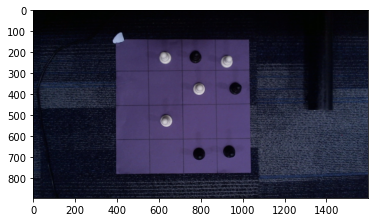

In [5]:
im=imread('images/Boards/board1.jpg')  # <-- change this to point to a single image example
imshow(im)

images/Boards/squares/board1_0.jpg
images/Boards/squares/board1_1.jpg
images/Boards/squares/board1_2.jpg
images/Boards/squares/board1_3.jpg
images/Boards/squares/board1_4.jpg
images/Boards/squares/board1_5.jpg
images/Boards/squares/board1_6.jpg
images/Boards/squares/board1_7.jpg
images/Boards/squares/board1_8.jpg
images/Boards/squares/board1_9.jpg
images/Boards/squares/board1_10.jpg
images/Boards/squares/board1_11.jpg
images/Boards/squares/board1_12.jpg
images/Boards/squares/board1_13.jpg
images/Boards/squares/board1_14.jpg
images/Boards/squares/board1_15.jpg
images/Boards/squares/board3_0.jpg
images/Boards/squares/board3_1.jpg
images/Boards/squares/board3_2.jpg
images/Boards/squares/board3_3.jpg
images/Boards/squares/board3_4.jpg
images/Boards/squares/board3_5.jpg
images/Boards/squares/board3_6.jpg
images/Boards/squares/board3_7.jpg
images/Boards/squares/board3_8.jpg
images/Boards/squares/board3_9.jpg
images/Boards/squares/board3_10.jpg
images/Boards/squares/board3_11.jpg
images/Board

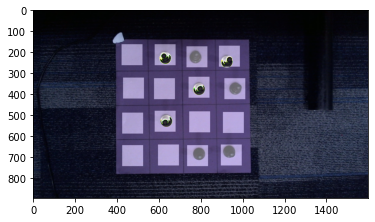

In [7]:
make_training_squares("images/Boards/*.jpg", #<--- change this to point to all images
                      (100,100)) #<-- change this for the size (in pixels) of your squares

Now I manually made folders.
